# Predict Housing Ages in R on Boston Housing Data using Caret 

## Coursera Project

In [7]:
#install.packages('neuralnet')
#install.packages('caret')

In [9]:
options(warn=-1)

In [10]:
library(neuralnet)
library(caret)
library(tidyverse)
library(MASS)

In [19]:
data(Boston)

In [20]:
df <- Boston

In [23]:
str(df)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [24]:
?Boston

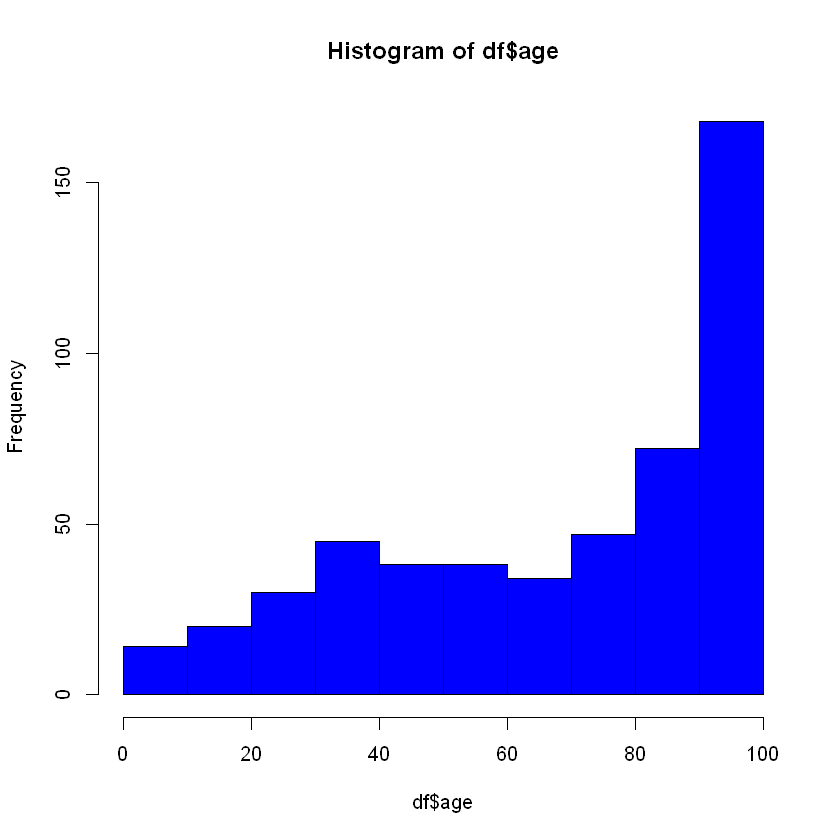

In [26]:
hist(df$age, col='blue')

In [27]:
summary(df)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [31]:
rows <- sample(1:nrow(df),nrow(df)*0.8, replace=F)

In [32]:
head(rows)

[1]  22 173 455 316 322 200

In [34]:
train_base <- df[rows,]
test_base <- df[-rows,]

In [35]:
dim(train_base)
dim(test_base)

[1] 404  14

[1] 102  14

In [36]:
# caret

In [39]:
rows2 <- createDataPartition(df$age,times=1,p=0.8,list=F)
train<-df[rows2,]
test<-df[-rows2,]

In [41]:
dim(train)
dim(test)

[1] 406  14

[1] 100  14

In [42]:
model_lm <- train(age~.,data=train,method='lm',trControl=trainControl(method='repeatedcv',number=2,repeats=2))

In [43]:
model_lm

Linear Regression 

406 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 204, 202, 203, 203 
Resampling results:

  RMSE      Rsquared  MAE     
  16.89936  0.651756  12.86466

Tuning parameter 'intercept' was held constant at a value of TRUE

In [48]:
#install.packages('ranger')
library(ranger)

In [49]:
model_rf <- train(age~.,data=train,method='ranger',trControl=trainControl(method='repeatedcv',number=2,repeats=2))

In [50]:
model_rf

Random Forest 

406 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 204, 202, 203, 203 
Resampling results across tuning parameters:

  mtry  splitrule   RMSE      Rsquared   MAE      
   2    variance    13.71414  0.7723251  10.090974
   2    extratrees  14.45558  0.7520472  10.814396
   7    variance    13.14776  0.7879223   9.496382
   7    extratrees  13.52195  0.7777233   9.889479
  13    variance    13.17226  0.7865871   9.478342
  13    extratrees  13.29541  0.7846794   9.699381

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 7, splitrule = variance
 and min.node.size = 5.

In [54]:
#install.packages('gbm')
library(gbm)

In [55]:
model_gbm <- train(age~.,data=train,method='gbm',trControl=trainControl(method='repeatedcv',number=2,repeats=2))

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1      702.3994             nan     0.1000   99.5823
     2      628.7373             nan     0.1000   75.5163
     3      570.6000             nan     0.1000   57.4393
     4      510.9218             nan     0.1000   61.6044
     5      458.4898             nan     0.1000   44.0174
     6      419.2204             nan     0.1000   32.0933
     7      383.8891             nan     0.1000   30.5604
     8      355.5800             nan     0.1000   31.0541
     9      334.7928             nan     0.1000   14.2916
    10      313.9371             nan     0.1000   16.2748
    20      210.7389             nan     0.1000    4.0444
    40      167.9393             nan     0.1000    0.8674
    60      152.6703             nan     0.1000   -0.6131
    80      142.6549             nan     0.1000   -2.7427
   100      135.9026             nan     0.1000   -0.7074
   120      129.7715             nan     0.1000   -0.8950
   140      12

In [56]:
sample <- resamples(list(Linear=model_lm,Forest=model_rf,GBM=model_gbm))

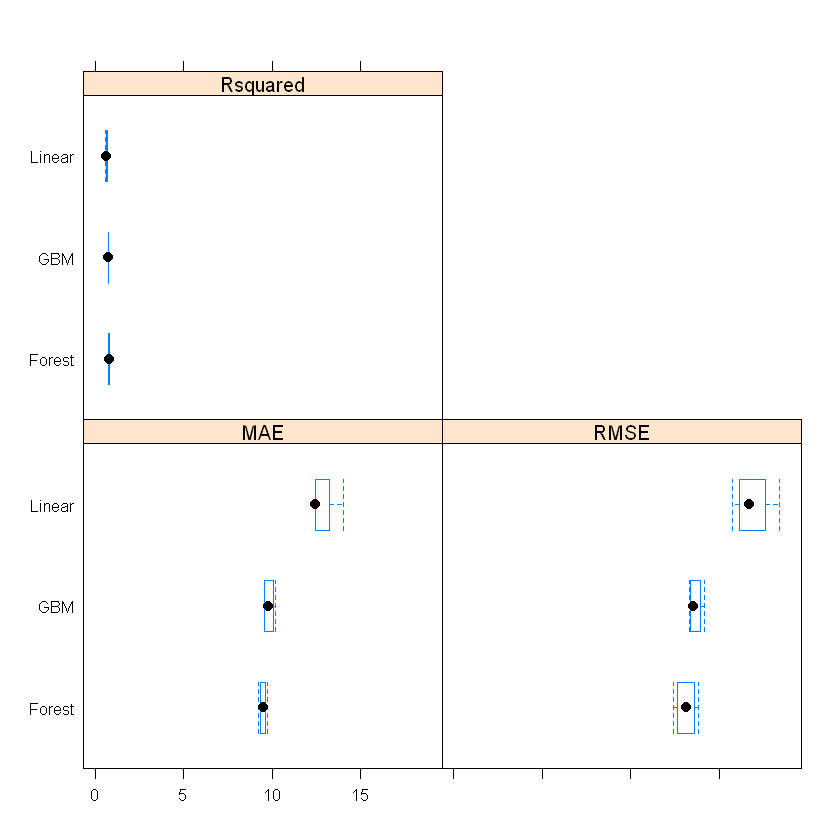

In [57]:
bwplot(sample)

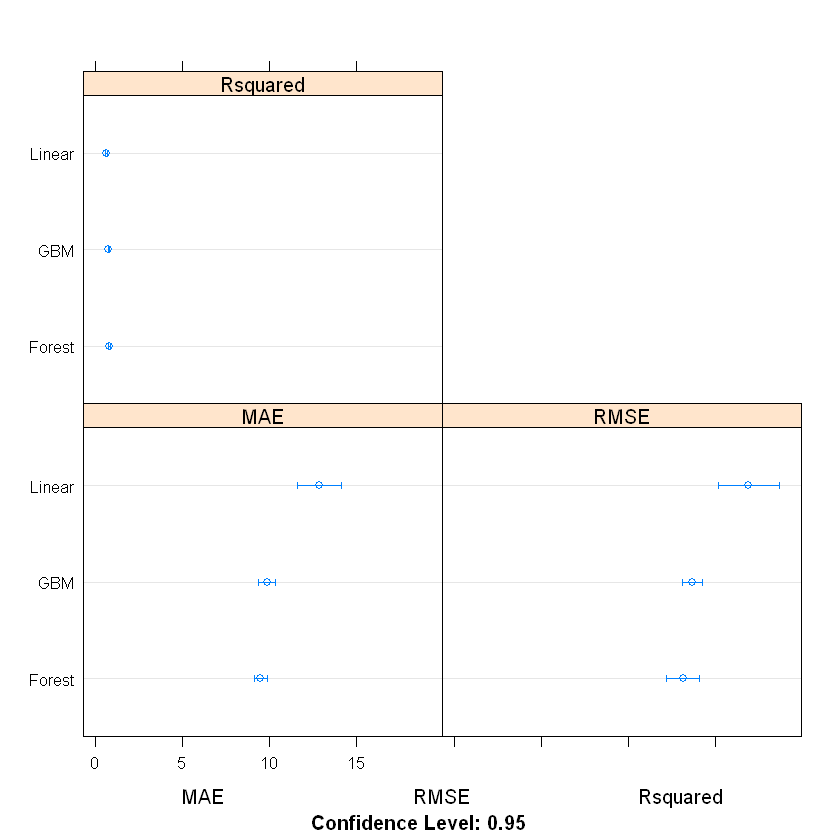

In [58]:
dotplot(sample)

In [59]:
summary(sample)


Call:
summary.resamples(object = sample)

Models: Linear, Forest, GBM 
Number of resamples: 4 

MAE 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Linear 12.455119 12.462471 12.478317 12.864663 12.880510 14.046900    0
Forest  9.208884  9.418808  9.514320  9.496382  9.591894  9.748002    0
GBM     9.581952  9.612480  9.795457  9.841187 10.024165 10.191880    0

RMSE 
           Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Linear 15.77184 16.36735 16.71480 16.89936 17.24680 18.39601    0
Forest 12.44780 12.78653 13.16547 13.14776 13.52670 13.81232    0
GBM    13.35729 13.40723 13.57551 13.66504 13.83332 14.15184    0

Rsquared 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Linear 0.6070397 0.6429432 0.6550195 0.6517560 0.6638323 0.6899451    0
Forest 0.7554518 0.7699914 0.7895861 0.7879223 0.8075170 0.8170654    0
GBM    0.7612077 0.7682767 0.7717465 0.7697697 0.7732396 0.7743783    0
